What is the log function?  It's a function that we will use to help describe the complexity of many different algorithms in this class, so we should understand something about it.

Let's start by plotting one version, the log "base 2."  We'll also plot a version that's rounded down (or "floored") to the nearest integer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Log Base 2 Function')

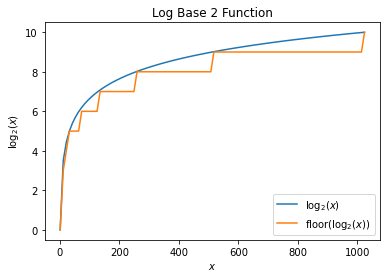

In [2]:
x = np.linspace(1, 1024, 100)
plt.plot(x, np.log2(x))
plt.plot(x, np.floor(np.log2(x)))
plt.xlabel("$x$")
plt.ylabel("$\\log_2(x)$")
plt.legend(["$\\log_2(x)$", "floor($\\log_2(x)$)"])
plt.title("Log Base 2 Function")

As we can see, it's a function that starts at 0 and grows very slowly.  We can define it more precisely as a function that returns how many factors of 2 go into into our number (calc students will know another definition, but this is fine for our purposes).  

Actually, this leads to a very nice "programmatic" definition of this function: keep dividing our number by 2 until we get to 1, and count how many times that took.  Or we can think spatially about dividing a stick in half repeatedly until we get a chunk of length 1.  

Let's do something like this now in code

In [3]:
def mylog2(x):
    """
    A programmatic definition of the floored version of log base 2 of x
    """
    temp = x
    res = 0
    while temp > 1:
        temp = temp // 2 # Floor division (aka round down)
        res += 1
    return res

For example, if I gave the number 5 and I did these floor divisions, I'd get the sequence

* 5
* 2  (first division)
* 1  (second division)

In [4]:
mylog2(5)

2

Just as a sanity check, let's plot this against what numpy's floored version gives us

Text(0.5, 1.0, "Comparing Numpy's Floored log2 To Ours")

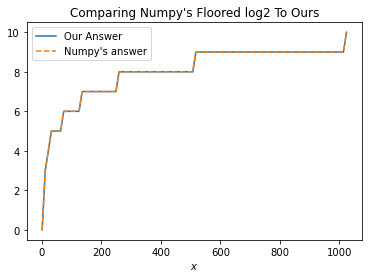

In [5]:
x = np.linspace(1, 1024, 100)
plt.plot(x, [mylog2(u) for u in x])
plt.plot(x, np.floor(np.log2(x)), linestyle='--')
plt.xlabel("$x$")
plt.legend(["Our Answer", "Numpy's answer"])
plt.title("Comparing Numpy's Floored log2 To Ours")

That's basically all you need to know about the log for this class!

Just one more note that another way to define the log is as the "inverse" of the exponential.  So log base 2 of x is the inverse of 2 raised to the x power.  Let's plot these next to each other

Text(0.5, 1.0, 'Log Base 2 Function')

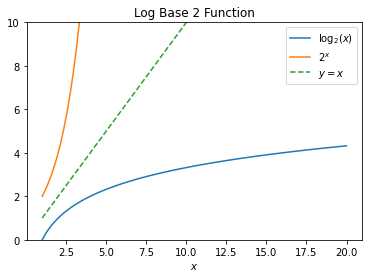

In [6]:
x = np.linspace(1, 20, 100)
plt.plot(x, np.log2(x))
plt.plot(x, 2**x)
plt.plot(x, x, linestyle='--')
plt.ylim([0, 10])
plt.xlabel("$x$")
plt.legend(["$\\log_2(x)$", "$2^x$", "$y=x$"])
plt.title("Log Base 2 Function")

What we see spatially is that $2^x$ is a reflection of $\log_2(x)$ about the line $y=x$.  What this means (and which we can see <a href = "https://purposefocuscommitment.medium.com/the-rice-and-the-chess-board-story-the-power-of-exponential-growth-b1f7bd70aaca">intuitively</a>) is that while the log grows <b>very slowly</b>, the exponential grows <b>very quickly</b>.  We're going to want to try to avoid algorithms whose complexity scales as an exponential at all costs in this class!